# Assignment 3

### Student 1: Francisco Soares Pinto da Silva Neves

## 1. Neural Networks

Consider the following fully connected neural network. It consists of an input layer, three hidden layers and an output layer. The first hidden layer utilized ReLU as its non-linearity function, whereas the second uses Tanh and the last uses the Sigmoid function. The output layer also utilizes the Sigmoid function. Consider $W_1, W_2, W_3 $and $W_4$ as a set of weight parameters, $x$ as your input, $y$ as the ground-truth and $\hat{y}$ as the network prediction/output. 

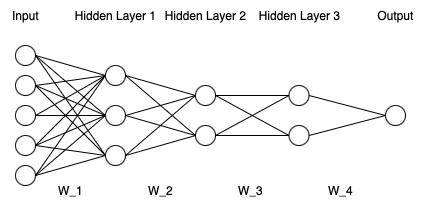

### 1.1 (Pen and Paper) 

##### Note that python should not be used.

**a)** How many parameters does this network have? Do not forget to include the bias in the three hidden layers and the output layer.  Explicitly show how you achieved your answer. 

#### (1) Number of parameters for Hidden Layer 1
Since the input layer has 5 features and the Hidden Layer 1 has 3 neurons, the total number of weight parameters is $5\times3 = 15$. Also, there is a bias for each neuron so there are 3 bias in total. Hence, in total, the number of parameters for the Hidden Layer 1 is $15 + 3 = 18$.
#### (2) Number of parameters for Hidden Layer 2
Since the previous Hidden Layer 1 has 3 neurons and the Hidden Layer 2 has 2 neurons, the total number of weight parameters is $3\times2 = 6$. Also, there is a bias for each neuron so there are 2 bias in total. Hence, in total, the number of parameters for the Hidden Layer 2 is $6 + 2 = 8$.
#### (3) Number of parameters for Hidden Layer 3
Since the previous Hidden Layer 2 has 2 neurons and the Hidden Layer 3 has 2 neurons, the total number of weight parameters is $2\times2 = 4$. Also, there is a bias for each neuron so there are 2 bias in total. Hence, in total, the number of parameters for the Hidden Layer 3 is $4 + 2 = 6$.
#### (4) Number of parameters for Output layer
Since the previous Hidden Layer 3 has 2 neurons and the Output layer has 1 neuron, the total number of weight parameters is $2\times1 = 2$. Also, there is a bias for each neuron so there is 1 bias in total. Hence, in total, the number of parameters is $2 + 1 = 3$.

Therefore, this network has $18+8+6+3=35$ parameters.


**b)** Considering the following cost/loss function $C(\hat{y}) = \frac{1}{2}||\hat{y} - y||^2$, derive $\frac{\partial C}{\partial W_1}$. Explicitly show the relation between $\frac{\partial C}{\partial W_1}$ and $\frac{\partial C}{\partial W_2}$.

The process of tuning the parameters of neural network is described by performing backpropagation. Backpropagation is a recursive process in which, from the output layer to the first hidden layer of the network, gradient relationships of the form $\frac{\partial C}{\partial W_k}$ with respect to each hidden layer $k$ are found. 

The feed forward propagation is the process of propagating the input values across the network, from a layer $j$ to a layer $k$ , where $j$ and $k$ are the indices of the previous layer and the next layer, respectively, and $L$ is the total number of layers in the network. This process is described by the following steps:
1. Initialize $k = 1$ and $j = k - 1$,
2. A weighted sum $z_k = W_k a_j$,
3. An activation operation $h$ on $z_k$ that is $a_k = h(z_k)$, where $h$ is any activation function on a layer, assuming that every neuron of a respective layer applies the same activation function (e.g., $h(z) = sigmoid(z), h(z) = tanh(z), h(z) = max(0,z), ...$),
4. Go back to 1, until $k = L$ and update $k = k + 1$ and $ j = j + 1$.

Explicitly, the forward propagation computes the following equations, recursively: $z_1 = W_1 X$, $a_1 = \max(0,z_1)$, $z_2 = W_2 a_1$, $a_2 = \tanh(z_2)$, $z_3 = W_3 a_2$, $a_3 = \sigma(z_3)$, $z_4 = W_4 a_3$ and $\hat{y} = a_4 = \sigma(z_4)$.

The backpropagation applies the chain rule for partial derivatives $\frac{\partial C}{\partial W_k}$, until the desired layer $k$.

#### (1) Deriving $\frac{\partial C}{\partial W_2}$
$\frac{\partial C}{\partial W_2}$ is defined by:
$\begin{equation}
\begin{split}
    \frac{\partial C}{\partial W_2} &= \frac{\partial C}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial z_4} \frac{\partial z_4}{\partial a_3} \frac{\partial a_3}{\partial z_3} \frac{\partial z_3}{\partial a_2} \frac{\partial a_2}{\partial z_2} \frac{\partial z_2}{\partial W_2} \\
    &= (\hat{y} - y) \cdot \sigma^{\prime}(z_4) \cdot W_4 \cdot \sigma^{\prime}(z_3) \cdot W_3 \cdot \tanh^{\prime}(z_2) \cdot a_1 \\
    &= (\hat{y} - y) \cdot \sigma(z_4)(1 - \sigma(z_4)) \cdot W_4 \cdot \sigma(z_3)(1 - \sigma(z_3)) \cdot W_3 \cdot (1 - \tanh(z_2)^2) \cdot a_1,
\end{split}
\end{equation}$

#### (2) Deriving $\frac{\partial C}{\partial W_1}$
$\frac{\partial C}{\partial W_1}$ is defined by: 
$\begin{equation}
\begin{split}
    \frac{\partial C}{\partial W_1} &= \frac{\partial C}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial z_4} \frac{\partial z_4}{\partial a_3} \frac{\partial a_3}{\partial z_3} \frac{\partial z_3}{\partial a_2} \frac{\partial a_2}{\partial z_2} \frac{\partial z_2}{\partial a_1} \frac{\partial a_1}{\partial z_1} \frac{\partial z_1}{\partial W_1}\\
    &= (\hat{y} - y) \cdot \sigma^{\prime}(z_4) \cdot W_4 \cdot \sigma^{\prime}(z_3) \cdot W_3 \cdot \tanh^{\prime}(z_2) \cdot W_2 \cdot ReLU^{\prime}(z_1
    ) \cdot X\\
    &= (\hat{y} - y) \cdot \sigma(z_4)(1 - \sigma(z_4)) \cdot W_4 \cdot \sigma(z_3)(1 - \sigma(z_3)) \cdot W_3 \cdot (1 - \tanh(z_2)^2) \cdot W_2 \cdot \left(\begin{cases}
        1 & \text{if } z_1 \ge 0\\
        0 & \text{if } z_1 < 0
    \end{cases}\right) \cdot X,
\end{split}
\end{equation}$
where $\sigma(z_i) = \frac{1}{1 + e^{-z_i}}$, $\tanh(z_i) = \frac{e^{z_i} - e^{-z_i}}{e^{z_i} + e^{-z_i}}$ and $ReLU(z_i) = \max(0,z_i)$.

#### (3) Relationship between $\frac{\partial C}{\partial W_1}$ and $\frac{\partial C}{\partial W_2}$
Finally, the following relationship between $\frac{\partial C}{\partial W_1}$ and $\frac{\partial C}{\partial W_2}$ is described by:
$\begin{equation}
\begin{split}
    \frac{\partial z_2}{\partial W_2} \frac{\partial C}{\partial W_1} &= \frac{\partial z_2}{\partial a_1} \frac{\partial a_1}{\partial z_1} \frac{\partial z_1}{\partial W_1} \frac{\partial C}{\partial W_2} \\
    \frac{\partial C}{\partial W_1} &= \frac{\frac{\partial z_2}{\partial a_1} \frac{\partial a_1}{\partial z_1} \frac{\partial z_1}{\partial W_1}}{\frac{\partial z_2}{\partial W_2}} \frac{\partial C}{\partial W_2} \\
    \frac{\partial C}{\partial W_1} &= \frac{W_2 \cdot ReLU(z_1) \cdot X}{a_1} \frac{\partial C}{\partial W_2}
\end{split}
\end{equation}$


**c)** What is the behaviour of the network if we initialize all weights to zero? What causes such behaviour? 

If all weights are initialized to zero, such as $W_1 = W_2 = W_3 = W_4 = \vec{0}$, the backpropagation never "moves" and thus the neural network never learns. 
Zero vector weights produce zero derivatives during backpropagation $\frac{\partial C}{W_i} = 0, \forall i \in \{1,4\}$, e.g.,: $\frac{\partial C}{\partial W_1} = \frac{0 \cdot ReLU(z_1) \cdot X}{a_1} \frac{\partial C}{\partial W_2} = 0$.
Thus, the literature suggests random initialization of weights near zero and never zero. Additionally, for certain activation functions such as the sigmoid or the hyperbolic tangent, weights initialized with values near zero result in roughly linear behaviour leading to the vanishing gradients problem where the gradients become locally stuck in the most flat part of these function derivatives. Vanished gradients are hard to solve, therefore it is suggested by the literature to avoid near zero random weight initialization when using sigmoid or hyperbolic tangent activation functions.

## 2. Neural Networks

### (Python Exercise)

Consider the `heightWeightData.txt` dataset that you have used in the Lab classes. You will use this data to build a Neural Network classifier that predicts the sex of an individual given their height and weight.

**a)** Train a fully-connected neural network classifier, with less than **20 parameters**, **using only the first 120 rows** of the dataset as training data. You should use the Keras framework. Utilize sigmoid as the non-linearity function, SGD as the optimizer, a batch size of 120, and a learning rate of 0,001. Do not change other configuration besides the number and size of the hidden layers, and the others previously mentioned. **Print the values of the learned parameters.**

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
from tensorflow.keras.utils import to_categorical

# 1. Define hyperparameters
lr, batch_size, epochs = 1e-3, 120, 30

# 2. Get data
data = pd.read_csv('heightWeightData.txt', sep = ",", header = None)
x_train, y_train = data.iloc[:120,1:].to_numpy(copy = True).reshape(-1,2), (data.iloc[:120,0].to_numpy(copy = True) - 1).reshape(-1,1).astype("int32")
#train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
#train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

# 3. Define optimizer
optimizer = keras.optimizers.SGD(learning_rate=lr)

# 4. Define loss function
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits = True)

# 5. Define metrics
metrics = keras.metrics.SparseCategoricalAccuracy()

# 6. Build the model
tf.keras.backend.set_floatx('float64')
model = keras.Sequential(
    [
        layers.Dense(3, input_shape = (2,), activation="sigmoid", name="layer1"),
        layers.Dense(2, activation="sigmoid", name="layer2")
    ]
)
print('Summary of the model: ', model.summary())

# 7. Compile the keras model
model.compile(loss=loss_fn, optimizer=optimizer, metrics=[metrics])

# 8. Train the model
model.fit(x=x_train, y=y_train, epochs=epochs, batch_size=batch_size, verbose = 2)

# 9. Print the learned weights
print('Learned parameters:')
for i, layer in enumerate(model.layers):
    print(f'Weights of layer {layer.name}: {layer.get_weights()[0]}')
    print(f'Biases of layer {layer.name}: {layer.get_weights()[1]}')
    

2022-12-12 18:47:34.651094: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ros/noetic/lib
2022-12-12 18:47:34.651124: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-12 18:47:36.541002: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ros/noetic/lib
2022-12-12 18:47:36.541028: W tensorflow/stream_executor/cuda/cuda_driver.cc:312] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-12 18:47:36.541047: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fsn9-ThinkPad-T450): /proc/driver/nvidia/versi

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 3)                 9         
_________________________________________________________________
layer2 (Dense)               (None, 2)                 8         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________
Summary of the model:  None
Epoch 1/30
1/1 - 0s - loss: 0.7665 - sparse_categorical_accuracy: 0.3833
Epoch 2/30
1/1 - 0s - loss: 0.7665 - sparse_categorical_accuracy: 0.3833
Epoch 3/30
1/1 - 0s - loss: 0.7665 - sparse_categorical_accuracy: 0.3833
Epoch 4/30
1/1 - 0s - loss: 0.7665 - sparse_categorical_accuracy: 0.3833
Epoch 5/30
1/1 - 0s - loss: 0.7665 - sparse_categorical_accuracy: 0.3833
Epoch 6/30
1/1 - 0s - loss: 0.7665 - sparse_categorical_accuracy: 0.3833
Epoch 7/30
1/1 - 0s - loss: 0.7664 - sparse_categorical_

**b)** Compute the predictions of your model in the remaining 90 rows of the dataset and report the classification accuracy of your model in this test set.

In [2]:
x_test, y_test = data.iloc[-90:,1:].to_numpy().reshape(-1,2), (data.iloc[-90:,0].to_numpy() - 1).reshape(-1,1).astype("int32")
evaluation = model.evaluate(x_test, y_test, verbose = 0)
preds = model.predict(x_test)
print(f'Accuracy: {evaluation[1]}')

Accuracy: 0.30000001192092896


**c)** Repeat a) and b) with a network with up to **400 parameters**. There is no need to print the learned parameters.

In [3]:
# YOUR CODE HERE

**d)** Repeat c), but add $L_2$ regularization.  Try the all following **$\lambda \in$  {0.1, 0.3, 0.5, 0.9}.**

In [4]:
# YOUR CODE HERE

**e)** Repeat c), but increase the learning rate to the following values {0.01, 10, 100}. Can you explain the behaviour of the model?  

In [5]:
# YOUR CODE HERE